In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn  # Neural network modules
import torch.optim as optim  # Optimization algorithms
from torchvision import datasets, transforms  # MNIST dataset and transformations
from torch.utils.data import DataLoader  # For batch loading

In [ ]:
# Device configuration (Use GPU if available, otherwise CPU)
# Why? GPUs are faster for matrix operations in neural networks
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Hyperparameters (Configuration settings for our model)
input_size = 784    # 28x28 pixels flattened to 1D array (784 values)
hidden_size1 = 128  # Number of neurons in first hidden layer
hidden_size2 = 64   # Number of neurons in second hidden layer
num_classes = 10    # Output classes (digits 0-9)
num_epochs = 10     # Number of times we'll go through the entire dataset
batch_size = 64     # Number of samples processed before updating weights
learning_rate = 0.001  # Step size for parameter updates

In [ ]:
# MNIST dataset transformations
# Why normalize? Makes training more stable by keeping values in small range
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST-specific mean and std
])

In [ ]:
# Load MNIST dataset
# Why separate train/test sets? To evaluate on unseen data (avoid cheating)
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

In [ ]:
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform
)

In [ ]:
# Data loaders (handles batch loading and shuffling)
# Why batches? More efficient than single-sample processing
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True  # Why shuffle? Prevent order bias in learning
)

In [ ]:
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False  # No need to shuffle test data
)

In [ ]:
# Neural network definition
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # Flatten 28x28 image to 784-element vector
        self.flatten = nn.Flatten()

        # Network architecture
        self.linear_relu_stack = nn.Sequential(
            # First hidden layer: 784 inputs -> 128 neurons
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),  # Activation function (introduce non-linearity)

            # Second hidden layer: 128 inputs -> 64 neurons
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),

            # Output layer: 64 inputs -> 10 outputs (digits 0-9)
            nn.Linear(hidden_size2, num_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)  # logits = raw prediction scores
        return logits

model = NeuralNet().to(device)  # Move model to GPU if available

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Combines softmax + negative log likelihood
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adaptive learning rate

In [ ]:
# Training loop
total_steps = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to device (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass: compute predictions
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        # Print progress
        if (batch_idx+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{total_steps}], Loss: {loss.item():.4f}')

    # Testing phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation (saves memory)
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get class with highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'mnist_ann.pth')

Epoch [1/10], Step [100/938], Loss: 0.5569
Epoch [1/10], Step [200/938], Loss: 0.4424
Epoch [1/10], Step [300/938], Loss: 0.2649
Epoch [1/10], Step [400/938], Loss: 0.1822
Epoch [1/10], Step [500/938], Loss: 0.1494
Epoch [1/10], Step [600/938], Loss: 0.2107
Epoch [1/10], Step [700/938], Loss: 0.1494
Epoch [1/10], Step [800/938], Loss: 0.1463
Epoch [1/10], Step [900/938], Loss: 0.2397
Test Accuracy: 96.02%
Epoch [2/10], Step [100/938], Loss: 0.0563
Epoch [2/10], Step [200/938], Loss: 0.0933
Epoch [2/10], Step [300/938], Loss: 0.1589
Epoch [2/10], Step [400/938], Loss: 0.1921
Epoch [2/10], Step [500/938], Loss: 0.0411
Epoch [2/10], Step [600/938], Loss: 0.0876
Epoch [2/10], Step [700/938], Loss: 0.1009
Epoch [2/10], Step [800/938], Loss: 0.0553
Epoch [2/10], Step [900/938], Loss: 0.1516
Test Accuracy: 97.05%
Epoch [3/10], Step [100/938], Loss: 0.0340
Epoch [3/10], Step [200/938], Loss: 0.0446
Epoch [3/10], Step [300/938], Loss: 0.0764
Epoch [3/10], Step [400/938], Loss: 0.0223
Epoch [3/1


**Key Concepts Explained:**

1. **MNIST Dataset**:
   - 70,000 handwritten digits (60k train + 10k test)
   - 28x28 grayscale images (0=black, 1=white)
   - Why use MNIST? Simple, standardized benchmark for learning

2. **Data Preprocessing**:
   - `ToTensor()`: Converts images to PyTorch tensors
   - `Normalize()`: Helps neural network learn faster (values between -1 and 1)

3. **Neural Network Architecture**:
   - **Input Layer**: 784 neurons (one per pixel)
   - **Hidden Layers** (128 → 64 neurons):
     - Learn complex patterns through hierarchical processing
     - ReLU activation adds non-linearity (enables complex function learning)
   - **Output Layer**: 10 neurons (probability scores for digits 0-9)

4. **Activation Function (ReLU)**:
   - Rectified Linear Unit: `f(x) = max(0, x)`
   - Why ReLU? Solves vanishing gradient problem, computationally efficient

5. **Loss Function (CrossEntropyLoss)**:
   - Measures difference between predicted probabilities and true labels
   - Combines softmax (convert to probabilities) and negative log likelihood (measure error)

6. **Optimizer (Adam)**:
   - Adaptive learning rate algorithm
   - Combines benefits of RMSProp and Momentum
   - Why Adam? Requires less tuning than plain SGD

7. **Training Process**:
   - **Epoch**: Full pass through the training data
   - **Batch**: Subset of data used for single weight update
   - **Forward Pass**: Compute predictions
   - **Backward Pass**: Calculate gradients (backpropagation)
   - **Weight Update**: Adjust parameters using optimizer

8. **Evaluation**:
   - `model.eval()`: Disables dropout/batch norm (if used)
   - `torch.no_grad()`: Saves memory by not tracking gradients
   - Accuracy: Percentage of correct predictions

**Why This Architecture?**
- Simple but effective for basic image classification
- Two hidden layers provide enough capacity to learn digits
- ReLU helps prevent gradient vanishing in deeper layers
- Adam optimizer gives good default performance

**Tips for Improvement**:
1. Add dropout layers for regularization
2. Try different activation functions (Leaky ReLU, ELU)
3. Add batch normalization layers
4. Use learning rate scheduling
5. Increase model depth/width
6. Add data augmentation

This implementation typically achieves **~97% accuracy** after 10 epochs. With more advanced techniques (like CNNs), you can reach >99% accuracy.

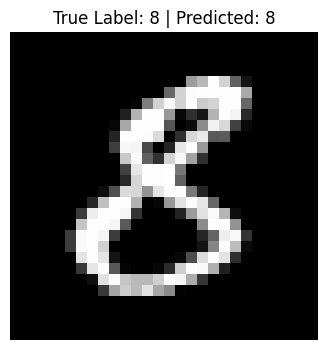


Prediction Confidence:
Digit 0: 0.00%
Digit 1: 0.00%
Digit 2: 0.00%
Digit 3: 0.00%
Digit 4: 0.00%
Digit 5: 0.00%
Digit 6: 0.00%
Digit 7: 0.00%
Digit 8: 100.00%
Digit 9: 0.00%


In [ ]:
import matplotlib.pyplot as plt

# Load the saved model (if needed)
# model = NeuralNet().to(device)
# model.load_state_dict(torch.load('mnist_ann.pth'))

# Set model to evaluation mode
model.eval()

# Select a random test sample
sample_index = 1234  # You can change this index to test different images
image, true_label = test_dataset[sample_index]
image = image.to(device)

# Add batch dimension (since model expects batches)
image = image.unsqueeze(0)  # Shape: [1, 1, 28, 28]

# Make prediction
with torch.no_grad():
    output = model(image)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities).item()

# Convert image back to CPU and numpy for plotting
image = image.squeeze().cpu().numpy()

# Denormalize the image
# (Reverse the normalization we did during preprocessing)
image = image * 0.3081 + 0.1307  # mean + (image * std)

# Display results
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f'True Label: {true_label} | Predicted: {predicted_class}')
plt.axis('off')
plt.show()

# Print confidence scores
print("\nPrediction Confidence:")
for i in range(10):
    print(f"Digit {i}: {probabilities[0][i].item()*100:.2f}%")